In [1]:
import os,sys
sys.path.append('/w/jam-sciwork24/prokudin/jam3d_dev_lib')
sys.path.append('/w/jam-sciwork24/prokudin/jam3dlib')
os.environ["JAM3D"] = "/w/jam-sciwork24/prokudin/jam3d_dev_lib"
from tools.tools     import checkdir,save,load,lprint
import tools.config
from tools.config    import load_config, conf
import numpy as np
from tmd import TMD
import matplotlib as plt
import pylab as py
import pandas as pd

In [2]:
cd '/w/jam-sciwork24/prokudin/jam3dlib'

/w/jam-sciwork24/prokudin/jam3dlib


## Load the TMD class

In [3]:
tag='JAM3D_2020' 
tmd=TMD(tag)

parman: pdf
order: [1, 'pdf', 'widths1_uv']
order: [1, 'pdf', 'widths1_sea']
parman: pdfpi-
parman: ffpi
order: [1, 'ffpi', 'widths1_fav']
order: [1, 'ffpi', 'widths1_ufav']
parman: ffk
order: [1, 'ffk', 'widths1_fav']
order: [1, 'ffk', 'widths1_ufav']
parman: ffh
parman: transversity
order: [1, 'transversity', 'widths1_uv']
order: [1, 'transversity', 'u N0 1']
order: [1, 'transversity', 'u N1 1']
order: [1, 'transversity', 'u a0 1']
order: [1, 'transversity', 'u b0 1']
order: [1, 'transversity', 'u b1 1']
order: [1, 'transversity', 'd N0 1']
order: [1, 'transversity', 'd N1 1']
order: [1, 'transversity', 'd a0 1']
parman: collinspi
order: [1, 'collinspi', 'widths1_fav']
order: [1, 'collinspi', 'widths1_ufav']
order: [1, 'collinspi', 'u N0 1']
order: [1, 'collinspi', 'u N1 1']
order: [1, 'collinspi', 'u a0 1']
order: [1, 'collinspi', 'u a1 1']
order: [1, 'collinspi', 'u b0 1']
order: [1, 'collinspi', 'u b1 1']
order: [1, 'collinspi', 'u b0 2']
order: [1, 'collinspi', 'u b1 2']
order: [

JAM3D_2020 is a tag for a given analysis. See the table in the readme file.

In [4]:
M = 0.93891897
Mpi = 0.135

## Sivers (TMD)

Generate the data

In [5]:
n=1 #take a subset of 50 replicas
KT=np.linspace(-0.99,0.99,250)
Q2=4.0
x=0.1
def rho_up(kTx,kTy):
    kT=np.sqrt(kTx**2+kTy**2)
    tmd_up_avg=np.mean([(tmd.eval(x,Q2,kT,'p','pdf',irep,icol=False)[1]\
                        -(kTx/M)*tmd.eval(x,Q2,kT,'p','sivers',irep,icol=False)[1]) for irep in range(n)],axis=0)
    return tmd_up_avg
rho_up_grid=[[rho_up(kTx,kTy) for kTx in KT] for kTy in KT]

def rho_down(kTx,kTy):
    kT=np.sqrt(kTx**2+kTy**2)
    tmd_down_avg=np.mean([(tmd.eval(x,Q2,kT,'p','pdf',irep,icol=False)[3]\
                        -(kTx/M)*tmd.eval(x,Q2,kT,'p','sivers',irep,icol=False)[3]) for irep in range(n)],axis=0)
    return tmd_down_avg
rho_down_grid=[[rho_down(kTx,kTy) for kTx in KT] for kTy in KT]

In [6]:
#--matplotlib
import matplotlib
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath} \usepackage{bm}"
matplotlib.rc('text',usetex=True)


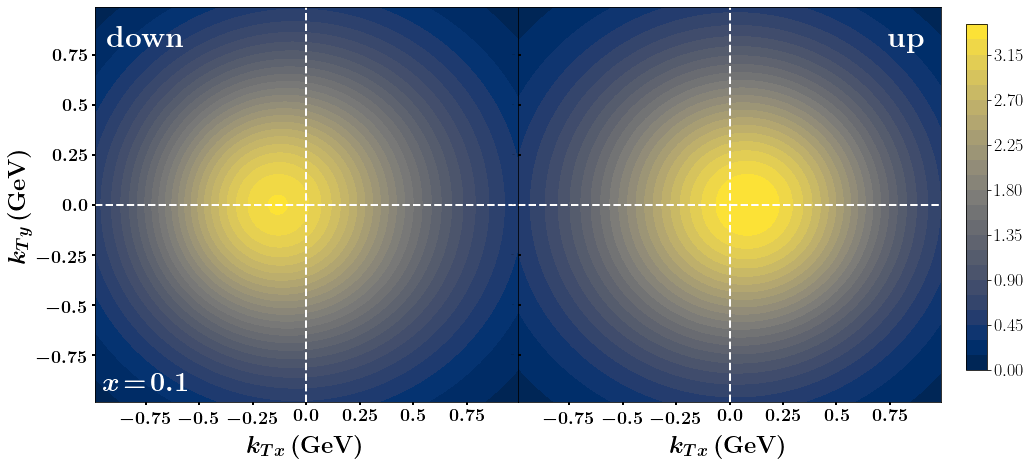

In [7]:
nrows,ncols=1,2
fig = py.figure(figsize=(ncols*7,nrows*6))

KTX, KTY = np.meshgrid(KT,KT)

ax1=py.subplot(nrows,ncols,1)
#c1=ax1.contourf(KTX,KTY,rho_down_grid,cmap='jet',levels=25)
c1=ax1.contourf(KTX,KTY,rho_down_grid,cmap='cividis',levels=25)
ax1.xaxis.set_tick_params(length=3,width=2,which='both',direction='out',labelsize=18)
ax1.yaxis.set_tick_params(length=3,width=2,which='both',direction='out',labelsize=18)
ax1.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax1.set_yticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax1.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax1.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax1.set_ylabel(r'\boldmath{$k_{Ty}\,{\rm (GeV)}$}',fontsize=24)
ax1.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax1.axhline(0,color='white',ls='--',linewidth=2)
ax1.axvline(0,color='white',ls='--',linewidth=2)
ax1.text(0.03,0.9,r'\boldmath{${\rm down}$}',size=30,color='white',transform=ax1.transAxes)
ax1.text(0.02,0.03,r'\boldmath{$x\!=\!0.1$}',size=27,color='white',transform=ax1.transAxes)

ax2=py.subplot(nrows,ncols,2,sharey=ax1)
#c2=ax2.contourf(KTX,KTY,rho_up_grid,cmap='jet',levels=25)
c2=ax2.contourf(KTX,KTY,rho_up_grid,cmap='cividis',levels=25)
ax2.xaxis.set_tick_params(length=3,width=2,which='both',direction='out',labelsize=18)
ax2.yaxis.set_tick_params(length=3,width=2,which='both',direction='in',labelsize=0)
ax2.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax2.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax2.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax2.axhline(0,color='white',ls='--',linewidth=2)
ax2.axvline(0,color='white',ls='--',linewidth=2)
ax2.text(0.875,0.9,r'\boldmath{${\rm up}$}',size=30,color='white',transform=ax2.transAxes)

cbar_ax=fig.add_axes([1., 0.15, 0.02, 0.8])
cbar_ax.tick_params(labelsize=18)

cbar=fig.colorbar(c2,cax=cbar_ax)
#cbar.set_ticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
#cbar.set_ticklabels([r'\boldmath{$0.0$}',r'\boldmath{$0.5$}',r'\boldmath{$1.0$}',r'\boldmath{$1.5$}'\
#                     ,r'\boldmath{$2.0$}',r'\boldmath{$3.0$}',r'\boldmath{$3.5$}',r'\boldmath{$4.0$}'])

py.subplots_adjust(py.subplots_adjust(left=0.135
                , bottom=0.075
                , right=0.975
                , top=0.99
                , wspace=0
                , hspace=0))

#py.savefig("./images/sivers_3D.pdf")

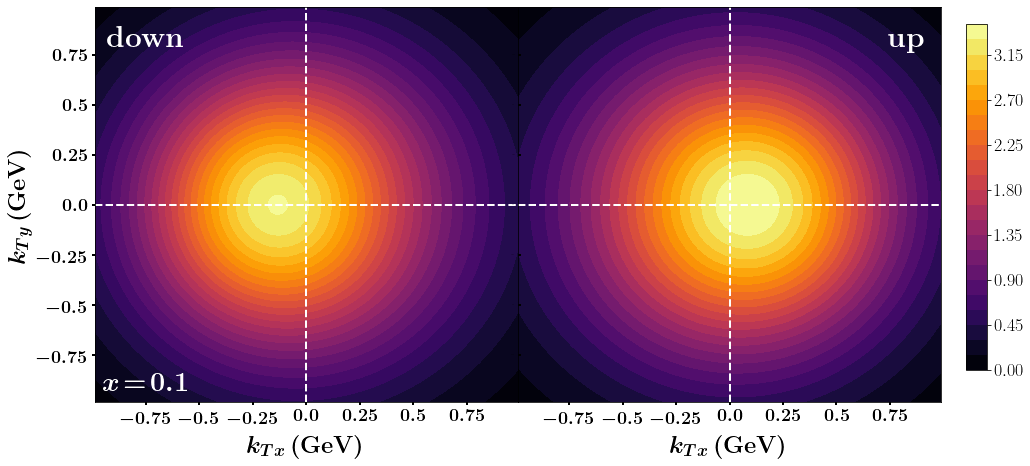

In [9]:
nrows,ncols=1,2
fig = py.figure(figsize=(ncols*7,nrows*6))

KTX, KTY = np.meshgrid(KT,KT)

ax1=py.subplot(nrows,ncols,1)
#c1=ax1.contourf(KTX,KTY,rho_down_grid,cmap='jet',levels=25)
c1=ax1.contourf(KTX,KTY,rho_down_grid,cmap='inferno',levels=25)
ax1.xaxis.set_tick_params(length=3,width=2,which='both',direction='out',labelsize=18)
ax1.yaxis.set_tick_params(length=3,width=2,which='both',direction='out',labelsize=18)
ax1.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax1.set_yticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax1.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax1.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax1.set_ylabel(r'\boldmath{$k_{Ty}\,{\rm (GeV)}$}',fontsize=24)
ax1.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax1.axhline(0,color='white',ls='--',linewidth=2)
ax1.axvline(0,color='white',ls='--',linewidth=2)
ax1.text(0.03,0.9,r'\boldmath{${\rm down}$}',size=30,color='white',transform=ax1.transAxes)
ax1.text(0.02,0.03,r'\boldmath{$x\!=\!0.1$}',size=27,color='white',transform=ax1.transAxes)

ax2=py.subplot(nrows,ncols,2,sharey=ax1)
#c2=ax2.contourf(KTX,KTY,rho_up_grid,cmap='jet',levels=25)
c2=ax2.contourf(KTX,KTY,rho_up_grid,cmap='inferno',levels=25)
ax2.xaxis.set_tick_params(length=3,width=2,which='both',direction='out',labelsize=18)
ax2.yaxis.set_tick_params(length=3,width=2,which='both',direction='in',labelsize=0)
ax2.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax2.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax2.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax2.axhline(0,color='white',ls='--',linewidth=2)
ax2.axvline(0,color='white',ls='--',linewidth=2)
ax2.text(0.875,0.9,r'\boldmath{${\rm up}$}',size=30,color='white',transform=ax2.transAxes)

cbar_ax=fig.add_axes([1., 0.15, 0.02, 0.8])
cbar_ax.tick_params(labelsize=18)

cbar=fig.colorbar(c2,cax=cbar_ax)
#cbar.set_ticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
#cbar.set_ticklabels([r'\boldmath{$0.0$}',r'\boldmath{$0.5$}',r'\boldmath{$1.0$}',r'\boldmath{$1.5$}'\
#                     ,r'\boldmath{$2.0$}',r'\boldmath{$3.0$}',r'\boldmath{$3.5$}',r'\boldmath{$4.0$}'])

py.subplots_adjust(py.subplots_adjust(left=0.135
                , bottom=0.075
                , right=0.975
                , top=0.99
                , wspace=0
                , hspace=0))

#py.savefig("./images/sivers_3D.pdf")